# Use Case: Time Series Forecast Model for Inventory Management
## Author : Pratik Shirbhate
## Date: 01-09-2020
### Description of use case:
Demand Forecast is the most critical aspect to manage inventory of a manufacturing company at an optimum level so as to  ensure prevention of wastage on one hand and enough products to take care of all customer need. We have a scenario where an automotive component manufacturing company manufactures gears based on the manual forecast (F) done by Marketing executive who are attached to big car manufacturers, while the actual number (A) are way off from the forecast resulting in either wastage or unable to meet the demand of the car companies (customers).

The automotive component manufacturing company decides to leverage Time Series Forecast model to be more accurate in the demand management by maintaining right level of inventory.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from datetime import timedelta

In [2]:
df = pd.read_excel('Usecase2_Dataset.xlsx', header=None)

In [3]:
df.shape

(340, 207)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Jan,NaN,NaN,NaN,NaN,Feb,NaN,NaN,NaN,...,Oct,NaN,NaN,NaN,NaN,Nov,NaN,NaN,NaN,NaN
2,Part No,WK 1,2.0,3.0,4.0,5.0,6,7.0,8.0,9.0,...,40,41.0,42.0,43.0,44.0,44,45.0,46.0,47.0,48.0
3,29032636,432,9316.0,8964.0,9000.0,6264.0,10476,9180.0,8856.0,6228.0,...,1512,1512.0,1260.0,1369.0,432.0,180,1404.0,1332.0,972.0,1512.0
4,29032635,432,9316.0,8964.0,9000.0,6192.0,10476,9180.0,8892.0,6228.0,...,1512,1512.0,1260.0,1368.0,432.0,180,1404.0,1332.0,972.0,1512.0


In [5]:
# There are duplicate product entries, te best way is to do sum of product quantities
df[0].nunique()/len(df[0])

0.5617647058823529

In [6]:
# We will handle this latter
df_headers = df.iloc[:3,:]
df_products = df.iloc[3:,:]
for col in df_products.columns:
    if col == 0:
        pass
    else:
        #df_products[col] = pd.to_numeric(df_products[col], errors='coerce')
        df_products.iloc[:,col]=pd.to_numeric(df_products.iloc[:,col], errors='coerce')
    df_products[col].fillna(0, inplace=True)

df_products_grouped = df_products.groupby(0).sum().reset_index()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [7]:
df = pd.concat([df_headers, df_products_grouped], axis=0)

In [8]:
# We could see that Year and months are missing and its intuitive to fill forward the missing values
df = df.ffill(axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,NaN,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,NaN,Jan,Jan,Jan,Jan,Jan,Feb,Feb,Feb,Feb,...,Oct,Oct,Oct,Oct,Oct,Nov,Nov,Nov,Nov,Nov
2,Part No,WK 1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,44,45,46,47,48
0,1.83456e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.83456e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# WK 2 should be replaced as 1
df.replace('WK 1', '1', inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,NaN,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,NaN,Jan,Jan,Jan,Jan,Jan,Feb,Feb,Feb,Feb,...,Oct,Oct,Oct,Oct,Oct,Nov,Nov,Nov,Nov,Nov
2,Part No,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,44,45,46,47,48
0,1.83456e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.83456e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df2 = df.transpose()

In [11]:
df2.head()

,0,1,2,0,1,2,3,4,5,6,...,180,181,182,183,184,185,186,187,188,189
0,NaN,NaN,Part No,1.83456e+07,1.83456e+07,1.9316e+07,1.9316e+07,2.90324e+07,2.90324e+07,2.90324e+07,...,32054388EG,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG
1,2016,Jan,1,0,0,0,0,24,24,200,...,0,0,0,0,0,0,0,0,0,0
2,2016,Jan,2,0,0,0,0,214,210,692,...,0,0,0,0,0,0,0,0,0,0
3,2016,Jan,3,0,0,0,0,162,162,864,...,0,0,0,0,0,0,0,0,0,0
4,2016,Jan,4,0,0,0,0,30,34,764,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Simple rearrangement of the data
df2.iloc[0,0] = 'Year'
df2.iloc[0,1] = 'Month'
df2.iloc[0,2] = 'Week'
df2.head()

,0,1,2,0,1,2,3,4,5,6,...,180,181,182,183,184,185,186,187,188,189
0,Year,Month,Week,1.83456e+07,1.83456e+07,1.9316e+07,1.9316e+07,2.90324e+07,2.90324e+07,2.90324e+07,...,32054388EG,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG
1,2016,Jan,1,0,0,0,0,24,24,200,...,0,0,0,0,0,0,0,0,0,0
2,2016,Jan,2,0,0,0,0,214,210,692,...,0,0,0,0,0,0,0,0,0,0
3,2016,Jan,3,0,0,0,0,162,162,864,...,0,0,0,0,0,0,0,0,0,0
4,2016,Jan,4,0,0,0,0,30,34,764,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Convert 1st row as column names
df2.columns = df2.iloc[0]
df2.head()

,Year,Month,Week,18345617.0,18345618.0,19316005.0,19316006.0,29032395.0,29032396.0,29032407.0,...,32054388EG,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG
0,Year,Month,Week,1.83456e+07,1.83456e+07,1.9316e+07,1.9316e+07,2.90324e+07,2.90324e+07,2.90324e+07,...,32054388EG,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG
1,2016,Jan,1,0,0,0,0,24,24,200,...,0,0,0,0,0,0,0,0,0,0
2,2016,Jan,2,0,0,0,0,214,210,692,...,0,0,0,0,0,0,0,0,0,0
3,2016,Jan,3,0,0,0,0,162,162,864,...,0,0,0,0,0,0,0,0,0,0
4,2016,Jan,4,0,0,0,0,30,34,764,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Drop the first row
df2 = df2.iloc[1:,:]
df2.head()

,Year,Month,Week,18345617.0,18345618.0,19316005.0,19316006.0,29032395.0,29032396.0,29032407.0,...,32054388EG,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG
1,2016,Jan,1,0,0,0,0,24,24,200,...,0,0,0,0,0,0,0,0,0,0
2,2016,Jan,2,0,0,0,0,214,210,692,...,0,0,0,0,0,0,0,0,0,0
3,2016,Jan,3,0,0,0,0,162,162,864,...,0,0,0,0,0,0,0,0,0,0
4,2016,Jan,4,0,0,0,0,30,34,764,...,0,0,0,0,0,0,0,0,0,0
5,2016,Jan,5,0,0,0,0,60,60,784,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Convert all columns to numeric except 'Week' (at index 1)
for i in [i for i in list(range(len(df2.columns))) if i not in [1]]:
    df2.iloc[:,i]=pd.to_numeric(df2.iloc[:,i], errors='coerce')

In [16]:
# Fill na with 0
df2.fillna(0, inplace=True)

In [17]:
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')

In [18]:
df2.head()

,Year,Month,Week,18345617.0,18345618.0,19316005.0,19316006.0,29032395.0,29032396.0,29032407.0,...,32054388EG,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG
1,2016-01-01,Jan,1.0,0.0,0.0,0.0,0.0,24.0,24.0,200.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01,Jan,2.0,0.0,0.0,0.0,0.0,214.0,210.0,692.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-01,Jan,3.0,0.0,0.0,0.0,0.0,162.0,162.0,864.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,Jan,4.0,0.0,0.0,0.0,0.0,30.0,34.0,764.0,...,0,0,0,0,0,0,0,0,0,0
5,2016-01-01,Jan,5.0,0.0,0.0,0.0,0.0,60.0,60.0,784.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Lets create a datetime columns based on Year and Week
#df2['date'] = df2['Year']+relativedelta(weeks=+df2['Week'])
#df2['date'] = df2['Year']+timedelta(weeks=df2['Week'])
df2['date'] = df2['Year']+ df2['Week'].map(timedelta)*7

In [20]:
df2.head()

,Year,Month,Week,18345617.0,18345618.0,19316005.0,19316006.0,29032395.0,29032396.0,29032407.0,...,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG,date
1,2016-01-01,Jan,1.0,0.0,0.0,0.0,0.0,24.0,24.0,200.0,...,0,0,0,0,0,0,0,0,0,2016-01-08
2,2016-01-01,Jan,2.0,0.0,0.0,0.0,0.0,214.0,210.0,692.0,...,0,0,0,0,0,0,0,0,0,2016-01-15
3,2016-01-01,Jan,3.0,0.0,0.0,0.0,0.0,162.0,162.0,864.0,...,0,0,0,0,0,0,0,0,0,2016-01-22
4,2016-01-01,Jan,4.0,0.0,0.0,0.0,0.0,30.0,34.0,764.0,...,0,0,0,0,0,0,0,0,0,2016-01-29
5,2016-01-01,Jan,5.0,0.0,0.0,0.0,0.0,60.0,60.0,784.0,...,0,0,0,0,0,0,0,0,0,2016-02-05


In [21]:
df2.index = df2['date']
#df2.index = pd.DatetimeIndex(df2.index).to_period('W')

In [22]:
df2.head()

,Year,Month,Week,18345617.0,18345618.0,19316005.0,19316006.0,29032395.0,29032396.0,29032407.0,...,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG,date
date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,2016-01-01,Jan,1.0,0.0,0.0,0.0,0.0,24.0,24.0,200.0,...,0,0,0,0,0,0,0,0,0,2016-01-08
2016-01-15,2016-01-01,Jan,2.0,0.0,0.0,0.0,0.0,214.0,210.0,692.0,...,0,0,0,0,0,0,0,0,0,2016-01-15
2016-01-22,2016-01-01,Jan,3.0,0.0,0.0,0.0,0.0,162.0,162.0,864.0,...,0,0,0,0,0,0,0,0,0,2016-01-22
2016-01-29,2016-01-01,Jan,4.0,0.0,0.0,0.0,0.0,30.0,34.0,764.0,...,0,0,0,0,0,0,0,0,0,2016-01-29
2016-02-05,2016-01-01,Jan,5.0,0.0,0.0,0.0,0.0,60.0,60.0,784.0,...,0,0,0,0,0,0,0,0,0,2016-02-05


In [23]:
df2.drop(columns=['Year', 'Month', 'Week'], inplace=True)

In [24]:
df2.columns = df2.columns.astype(str)
df2.columns = [x.replace('.0', '') for x in df2.columns]

In [25]:
df2.head()

,18345617,18345618,19316005,19316006,29032395,29032396,29032407,29032408,29032411,29032412,...,32054389EG,A005H177,A005H178,A005Y137,A005Y138,A008A576,A008A576EG,A008A578,A008A578EG,date
date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,0.0,0.0,0.0,0.0,24.0,24.0,200.0,200.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-08
2016-01-15,0.0,0.0,0.0,0.0,214.0,210.0,692.0,692.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-15
2016-01-22,0.0,0.0,0.0,0.0,162.0,162.0,864.0,868.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2016-01-22
2016-01-29,0.0,0.0,0.0,0.0,30.0,34.0,764.0,765.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,2016-01-29
2016-02-05,0.0,0.0,0.0,0.0,60.0,60.0,784.0,784.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2016-02-05


In [26]:
def plot_demand_trend(col):
    plt.plot(df2.index, df2[col])
    plt.xticks(rotation=-45)
    plt.yticks(label='Quantity')
    plt.title("Demand Trend for {}".format(col))
    plt.show()

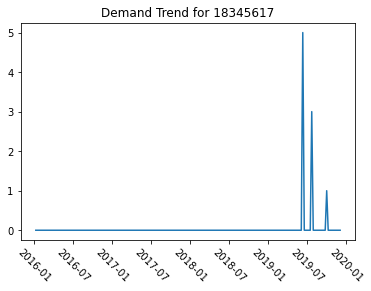

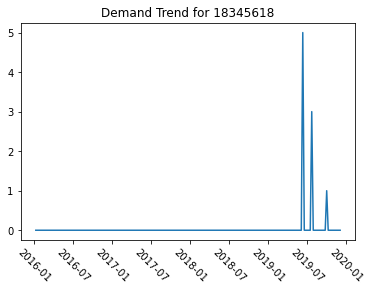

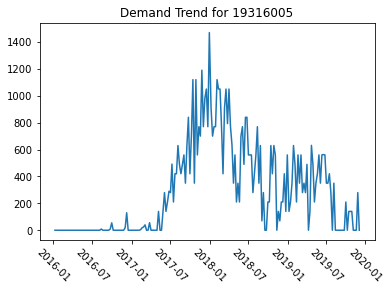

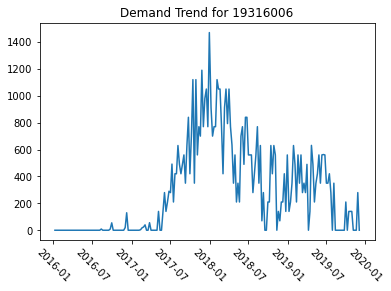

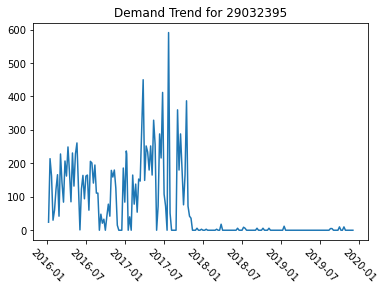

In [27]:
for col in list(df2.columns[:5]):
    plot_demand_trend(col)

In [28]:
# Now we have procesed data, we can move ahead with the time series forecast modelling
# There are 190+ different products, so we will need to create 190+ models and do the feature engineering
# We could also try to cluster these products so that we will have fewer models to train

In [29]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
# contrived dataset
train_data = df2['2016-01':'2019-06']['19316005']
test_data = df2['2019-07':]['19316005']
# fit model
model = AutoReg(train_data, lags=1)
model_fit = model.fit()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
# make prediction
yhat = model_fit.predict(len(train_data),len(train_data)+len(test_data)-1, dynamic=7)

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


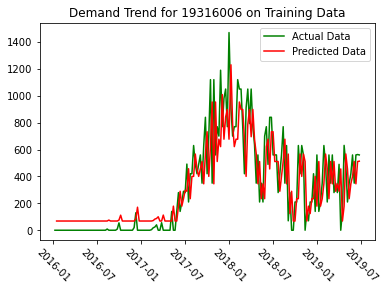

In [31]:
plt.plot(train_data.index, train_data, color='green', label='Actual Data')
plt.plot(train_data.index, model_fit.predict(0), color='red', label='Predicted Data')
plt.xticks(rotation=-45)
plt.yticks(label='Quantity')
plt.title("Demand Trend for {} on Training Data".format('19316006'))
plt.legend()
plt.show()

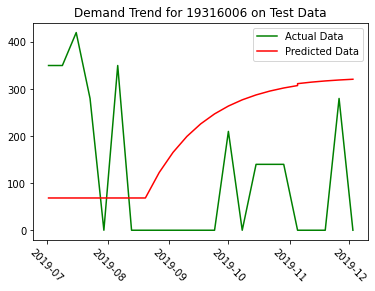

In [32]:
plt.plot(test_data.index, test_data, color='green', label='Actual Data')
plt.plot(test_data.index, yhat, color='red', label='Predicted Data')
plt.xticks(rotation=-45)
plt.yticks(label='Quantity')
plt.title("Demand Trend for {} on Test Data".format('19316006'))
plt.legend()
plt.show()

In [33]:
def plot_model_performace(model):
    """
    """
    # contrived dataset
    model_fit = model.fit()
    yhat = model_fit.predict(len(train_data),len(train_data)+len(test_data)-1, dynamic=7)
    plt.plot(train_data.index, train_data, color='green', label='Actual Data')
    plt.plot(train_data.index, model_fit.predict(0), color='red', label='Predicted Data')
    plt.xticks(rotation=-45)
    plt.yticks(label='Quantity')
    plt.title("Demand Trend for {} on Training Data".format('19316006'))
    plt.legend()
    plt.show()
    plt.plot(test_data.index, test_data, color='green', label='Actual Data')
    plt.plot(test_data.index, yhat, color='red', label='Predicted Data')
    plt.xticks(rotation=-45)
    plt.yticks(label='Quantity')
    plt.title("Demand Trend for {} on Test Data".format('19316006'))
    plt.legend()
    plt.show()
    return

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


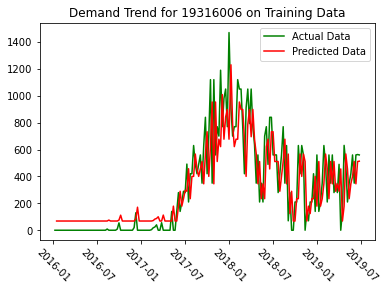

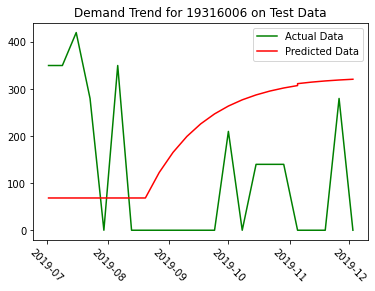

In [34]:
# AR Model
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train_data, lags=1)
plot_model_performace(model)

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


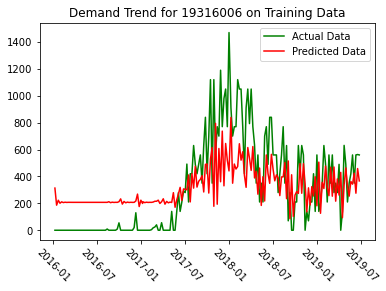

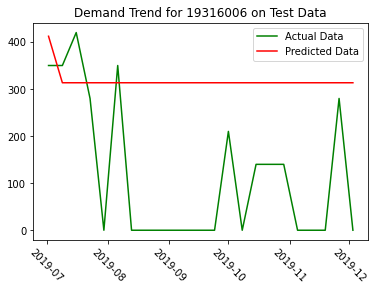

In [35]:
# MA Model
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train_data, order=(0, 1))
plot_model_performace(model)

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


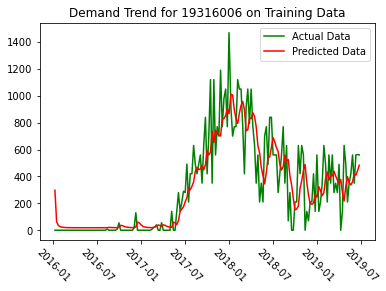

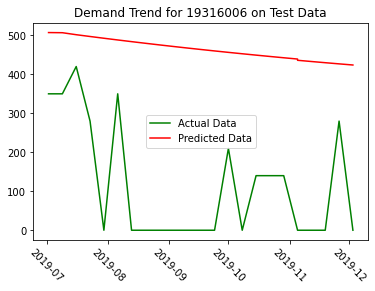

In [36]:
# MA Model
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train_data, order=(2, 1))
plot_model_performace(model)

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\statsmodels

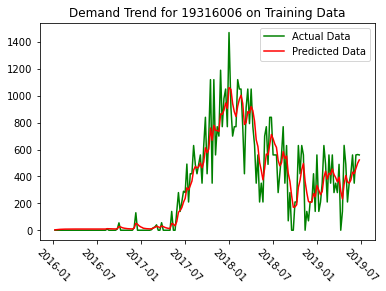

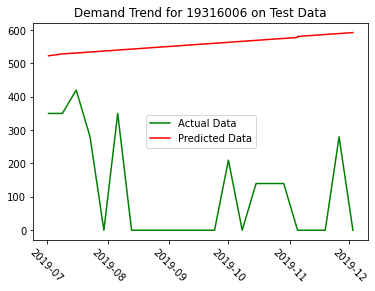

In [37]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()
yhat = model_fit.predict(len(train_data),len(train_data)+len(test_data)-1, dynamic=7, typ='levels')
plt.plot(train_data.index, train_data, color='green', label='Actual Data')
plt.plot(train_data.index, model_fit.predict(1, len(train_data), typ='levels'), color='red', label='Predicted Data')
plt.xticks(rotation=-45)
plt.yticks(label='Quantity')
plt.title("Demand Trend for {} on Training Data".format('19316006'))
plt.legend()
plt.show()
plt.plot(test_data.index, test_data, color='green', label='Actual Data')
plt.plot(test_data.index, yhat, color='red', label='Predicted Data')
plt.xticks(rotation=-45)
plt.yticks(label='Quantity')
plt.title("Demand Trend for {} on Test Data".format('19316006'))
plt.legend()
plt.show()